# Pretatamiento de datos
### Conversion de variables categoricas a numericas


In [13]:
import pandas as pd

df = pd.read_csv('Titanic.csv')

In [14]:
# Sacamos datos que no afectaron la chance de sobrevivir
df = df.drop(['PassengerId', 'Name', 'Ticket','Fare','Embarked'], axis=1)

# Rellena valores faltantes de edad
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convertimos variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Ponemos la letra de la cabina (ejemplo: C de C85)
df['Cabin'] = df['Cabin'].fillna('Unknown')  # Rellenar NaN con 'Unknown'
df['Cabin'] = df['Cabin'].str[0]  # Primera letra
df['Cabin'] = df['Cabin'].map({c: i for i, c in enumerate(df['Cabin'].unique())})  # Codificar como numérico

# Las 3 columnas restantes son clase, familiares y padres-hijos abordo juntos. Estas ya estan en forma numerica y no requieren modificación

# Prueba de valores nulos
print(df.isnull().sum())  # Deberia imprimir 0 en todas las columnas

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Cabin       0
dtype: int64


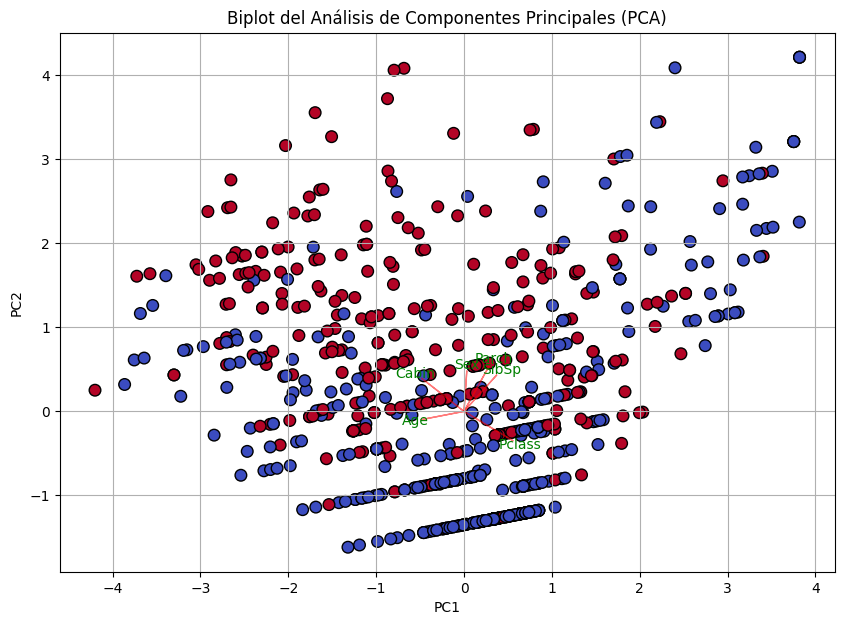

In [15]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar los datos
X = df.drop('Survived', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Crear biplot
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 7))
    xs = score[:, 0]
    ys = score[:, 1]
    plt.scatter(xs, ys, c=df['Survived'], cmap='coolwarm', edgecolor='k', s=70)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Dibujar los vectores de las características
    for i, (x, y) in enumerate(coeff.T):
        plt.arrow(0, 0, x, y, color='r', alpha=0.5)
        if labels is None:
            plt.text(x * 1.15, y * 1.15, f"Var{i+1}", color='g', ha='center', va='center')
        else:
            plt.text(x * 1.15, y * 1.15, labels[i], color='g', ha='center', va='center')

# Ejecutar el biplot
biplot(pca_result, pca.components_, labels=X.columns)
plt.title("Biplot del Análisis de Componentes Principales (PCA)")
plt.show()
